# Benchmark Evaluation Notebook

For fast evaluation of results from benchmarking pipeline changes.

In [1]:
# Packages import
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings; warnings.simplefilter('ignore')
from scipy.optimize import curve_fit

# Get the directory path
wd = os.path.dirname(os.getcwd())

# Create the formatted path to the SPARCED input files
sparced_root = ('/'.join(wd.split(os.path.sep)[:wd.split(os.path.sep)
                                              .index('SPARCED')+1]))

sys.path.append(os.path.join(sparced_root, 'src/validation/visualization/'))
from viz_helpers import *

os.chdir(os.path.join(sparced_root, 'benchmarks'))

#prompt user for the date of simulation
DATE_CONST = input('Enter the date of the simulation (YYYY-MM-DD): ')

### Stochastic Expression Benchmark

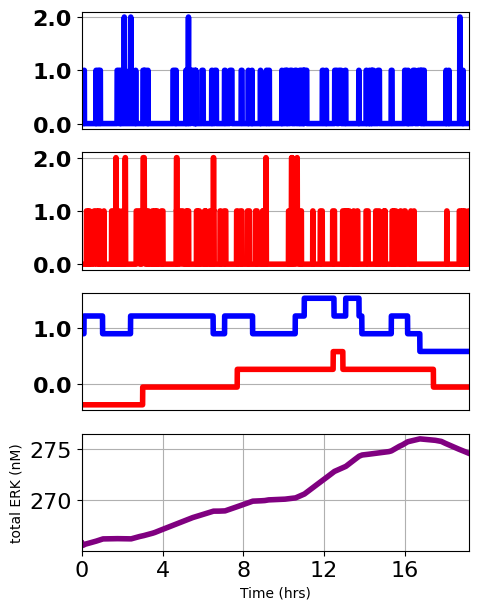

In [7]:
with open(f'stochastic-expression/results/{DATE_CONST}.pkl', 'rb') as f: 
    data = pickle.load(f)

    fig, ax = plt.subplots(4, 1, figsize=(5, 7))

    benchmark1_key = [key for key in data.keys()][0]

    ax[0].plot(data[benchmark1_key]['time']/3600.0,
            data[benchmark1_key]['simulation MAPK1ac'],'b',linewidth=4)

    ax[0].grid(True)
    ax[0].set_xlim(0, 24)
    ax[0].set_xticks([])
    ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=16, weight='bold')

    ax[1].plot(data[benchmark1_key]['time']/3600.0,
                data[benchmark1_key]['simulation MAPK3ac'],'r',linewidth=4)
    ax[1].grid(True)
    ax[1].set_xlim(0, 24)
    ax[1].set_xticks([])
    ax[1].set_yticklabels(ax[0].get_yticks(), fontsize=16, weight='bold')

    mRNA_MAPK1_2mpc = (data[benchmark1_key]['simulation MAPK1_mRNA']*
                       (1/(1.0E9/(5.2500E-12*6.023E+23))))
    mRNA_MAPK3_2mpc = (data[benchmark1_key]['simulation MAPK3_mRNA']*
                       (1/(1.0E9/(5.2500E-12*6.023E+23))))

    ax[2].plot(data[benchmark1_key]['time']/3600.0,
               mRNA_MAPK1_2mpc,'b',linewidth=4)
    ax[2].grid(True)
    ax[2].set_xlim(0, 24)

    ax[2].set_xticks([])
    ax[2].set_yticklabels(ax[0].get_yticks(), fontsize=16, weight='bold')

    ax[2].yaxis.get_offset_text().set_fontsize(24)
    ax[2].yaxis.get_offset_text().set_weight('bold')
    # ax[2].ticklabel_format(style='sci', scilimits=(1, 1))
    ax[2].plot(data[benchmark1_key]['time']/3600.0,mRNA_MAPK3_2mpc,
               'r',linewidth=4)

    ax[3].plot(data[benchmark1_key]['time']/3600.0,
            data[benchmark1_key]['simulation ERK_total'],'k',linewidth=4, 
            color = 'purple')

    ax[3].set_xlabel('Time (hrs)')
    ax[3].set_ylabel('total ERK (nM)', multialignment='center')
    ax[3].grid(True)
    ax[3].set_xlim(0, 24)
    ax[3].set_xticklabels(np.arange(0,25,step=4), fontsize=16)

    # For setting x-tick properties
    ax[3].tick_params(axis='both', labelsize=16)
    ax[3].tick_params(axis='y', labelsize=16)

    plt.savefig('stochastic-expression/results/\
                Stochastic Expression of ERK Dynamics.png')


### Receptor-Ligand Cooperativity Benchmark

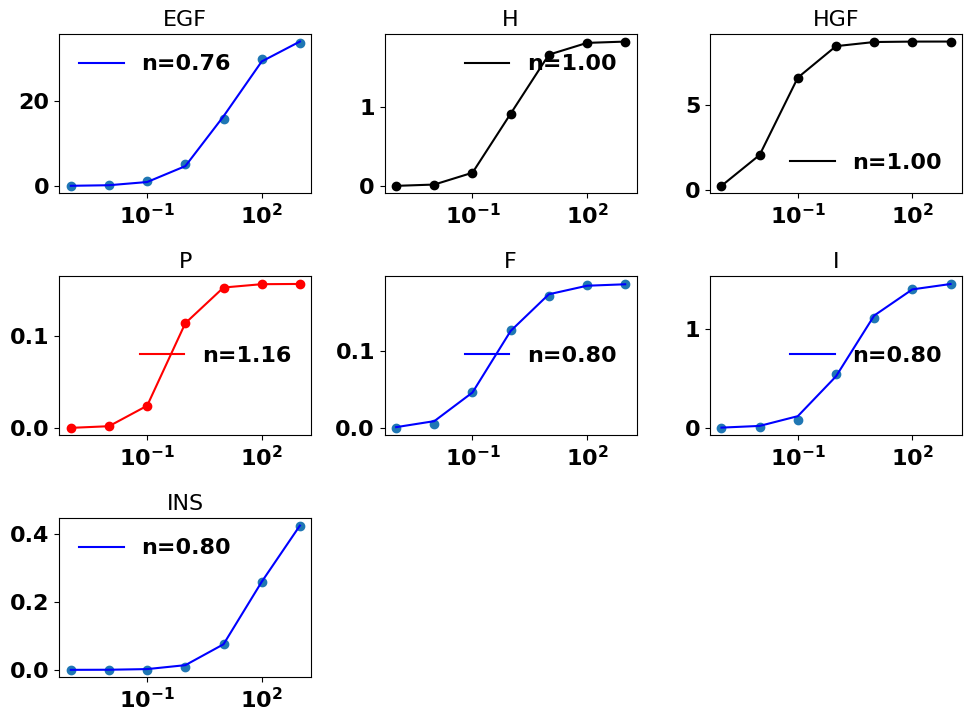

In [2]:
with open(f'receptor-ligand_cooperativity/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)


# 
ligInds = [155,156,157,158,159,160,161]
ligConc = [0.001,0.01,0.1,1,10,100,1000]
ResInds = [162,166,167,170,171,172,173,174]
RecConc = 60.8754593

conds = {}

observables = ['EE1_species', 'HE3_species', 'HE4_species', 'HGF_species', 'Ppr_species',
                'Ffr_species', 'EE1E2_species', 'EE1Ev3_species', 'EE1E4_species', 'E2HE3_species', 
                'E1HE3_species', 'HE3E3_species', 'HE3Ev3_species', 'HE3E4_species', 'E2HE4_species', 
                'HE4Ev3_species', 'E1HE4_species', 'E3HE4_species', 'HE4E4_species', 'HGF_Met_Met_species', 
                'PPrPr_species', 'FFrFr_species', 'IIrIr_species', 'INS_Isr_Isr_species', 'EE1EE1_species', 
                'EE1HE3_species', 'EE1HE4_species', 'HE3HE3_species', 'HE3HE4_species', 'HE4HE4_species', 
                'HGF_Met_HGF_Met_species', 'PPrPPr_species', 'FFrFFr_species', 'IIrIrI_species', 'INS_Isr_Isr_INS_species']


for condition in data:
    SPInds = []
    SPPInds = []
    SPSPInds = []
    for i in range(6):
        SPInds.append(data[condition][f'simulation {observables[i]}'][-1])
    for i in range(6, 26):
        SPPInds.append(data[condition][f'simulation {observables[i]}'][-1])
    for i in range(26, 35):
        SPSPInds.append(data[condition][f'simulation {observables[i]}'][-1])

    ns_prod_sum = sum(SPInds) + sum(SPPInds) + 2.0*sum(SPSPInds)

    conds[condition] = ns_prod_sum


egf_results = list(conds.values())[0:7]
h_results = list(conds.values())[7:14]
hgf_results = list(conds.values())[14:21]
p_results = list(conds.values())[21:28]
f_results = list(conds.values())[28:35]
i_results = list(conds.values())[35:42]
ins_results = list(conds.values())[42:49]

list_of_results = [egf_results, h_results, hgf_results, p_results, f_results, i_results, ins_results]
list_of_ligands = ['EGF', 'H', 'HGF', 'P', 'F', 'I', 'INS']

# Define the Sigmoid-Hill equation
def func(x, a, b, c):
    return a * np.power(x, b) / (np.power(c, b) + np.power(x, b))

# Calculate the number of rows based on the number of results
num_results = len(list_of_results)
num_columns = 3
num_rows = -(-num_results // num_columns)  # Ceiling division to ensure all results are shown


# Set global plot attributes
plt.rc('font', size=16, weight='bold')  # Set fontsize and font weight
plt.rc('axes', titlesize=16)             # Set title fontsize
# plt.rc('axes', labelsize=12)             # Set label fontsize
plt.rc('xtick', labelsize=16)            # Set x-axis tick label fontsize
plt.rc('ytick', labelsize=16)            # Set y-axis tick label fontsize
plt.rc('legend', fontsize=16)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7.5))

hill_curve_data = {}

# Loop through each lig_result and plot on separate subplots
for i, lig_result in enumerate(list_of_results):
    hill_curve_data[list_of_ligands[i]] = {}
    x_data = ligConc
    y_data = lig_result
    # Fit the curve
    params, covariance = curve_fit(func, x_data, y_data, maxfev = 100000)
    a_fit, b_fit, c_fit = params
    y_fit = func(x_data, a_fit, b_fit, c_fit)

    hill_curve_data[list_of_ligands[i]]['x'] = x_data
    hill_curve_data[list_of_ligands[i]]['y'] = y_data
    hill_curve_data[list_of_ligands[i]]['fit'] = y_fit
    hill_curve_data[list_of_ligands[i]]['hill coefficient'] = b_fit


axes[0, 0].scatter(hill_curve_data['EGF']['x'], hill_curve_data['EGF']['y'])
axes[0, 0].plot(hill_curve_data['EGF']['x'], hill_curve_data['EGF']['fit'], \
    label=f'n={hill_curve_data["EGF"]["hill coefficient"]:.2f}', color='blue')
axes[0, 0].set_title('EGF')
axes[0, 0].set_xscale('log', base=10)
axes[0, 0].legend(frameon=False)

axes[0, 1].scatter(hill_curve_data['H']['x'], hill_curve_data['H']['y'], color='black')
axes[0, 1].plot(hill_curve_data['H']['x'], hill_curve_data['H']['fit'], \
    label=f'n={hill_curve_data["H"]["hill coefficient"]:.2f}', color='black')
axes[0, 1].set_title('H')
axes[0, 1].set_xscale('log', base=10)
axes[0, 1].legend(frameon=False)

axes[0, 2].scatter(hill_curve_data['HGF']['x'], hill_curve_data['HGF']['y'], color='black')
axes[0, 2].plot(hill_curve_data['HGF']['x'], hill_curve_data['HGF']['fit'], \
    label=f'n={hill_curve_data["HGF"]["hill coefficient"]:.2f}', color='black')
axes[0, 2].set_title('HGF')
axes[0, 2].set_xscale('log', base=10)
axes[0, 2].legend(frameon=False)

axes[1, 0].scatter(hill_curve_data['P']['x'], hill_curve_data['P']['y'],color='red')
axes[1, 0].plot(hill_curve_data['P']['x'], hill_curve_data['P']['fit'], \
    label=f'n={hill_curve_data["P"]["hill coefficient"]:.2f}', color='red')
axes[1, 0].set_title('P')
axes[1, 0].set_xscale('log', base=10)
axes[1, 0].legend(frameon=False)

axes[1, 1].scatter(hill_curve_data['F']['x'], hill_curve_data['F']['y'])
axes[1, 1].plot(hill_curve_data['F']['x'], hill_curve_data['F']['fit'], \
    label=f'n={hill_curve_data["F"]["hill coefficient"]:.2f}', color='blue')
axes[1, 1].set_title('F')
axes[1, 1].set_xscale('log', base=10)
axes[1, 1].legend(frameon=False)

axes[1, 2].scatter(hill_curve_data['I']['x'], hill_curve_data['I']['y'])
axes[1, 2].plot(hill_curve_data['I']['x'], hill_curve_data['I']['fit'], \
    label=f'n={hill_curve_data["I"]["hill coefficient"]:.2f}', color='blue')
axes[1, 2].set_title('I')
axes[1, 2].set_xscale('log', base=10)
axes[1, 2].legend(frameon=False)

axes[2, 0].scatter(hill_curve_data['INS']['x'], hill_curve_data['INS']['y'])
axes[2, 0].plot(hill_curve_data['INS']['x'], hill_curve_data['INS']['fit'], \
    label=f'n={hill_curve_data["INS"]["hill coefficient"]:.2f}', color='blue')
axes[2, 0].set_title('INS')
axes[2, 0].set_xscale('log', base=10)
axes[2, 0].legend(frameon=False)


fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])
plt.tight_layout()

# Show the entire figure
plt.savefig('receptor-ligand-cooperativity.png')

### Proliferation and Growth Benchmark

dict_keys(['conditionId', 'cell', 'simulation ppERK_total', 'experiment ppERK_total', 'simulation ppAKT_total', 'experiment ppAKT_total', 'simulation pEIF4BP1_total', 'experiment pEIF4BP1_total', 'time'])


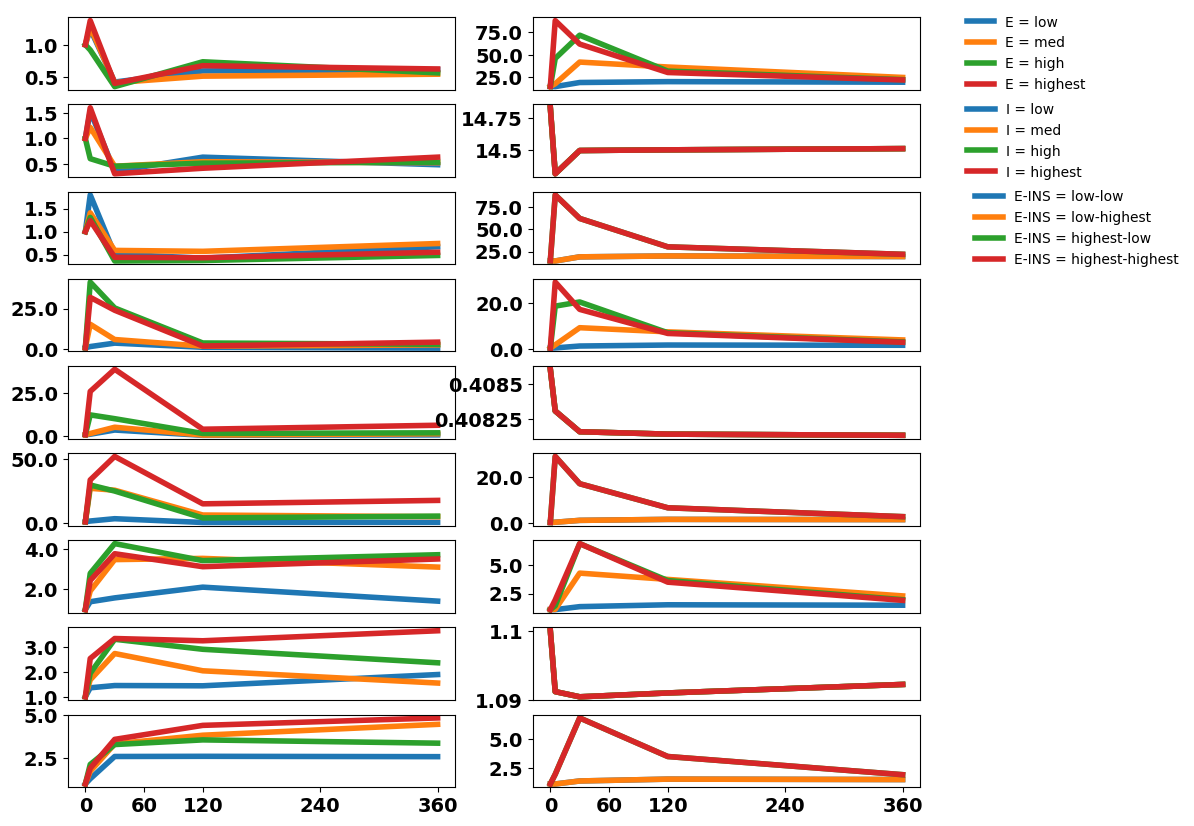

In [16]:
with open(f'proliferation-growth/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)
    
conditions = []

for key in data:
    conditions.append(key)

fig, axs = plt.subplots(9, 2, figsize=(11, 10))

#Experimental EGF for ppERK
axs[0,0].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['experiment ppERK_total'], linewidth=4)
axs[0,0].plot(data[conditions[0]]['time']/3600, data[conditions[1]]['experiment ppERK_total'], linewidth=4)
axs[0,0].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['experiment ppERK_total'], linewidth=4)
axs[0,0].plot(data[conditions[3]]['time']/3600, data[conditions[3]]['experiment ppERK_total'], linewidth=4)

#Experimental INS for ppERK
axs[1,0].plot(data[conditions[4]]['time']/3600, data[conditions[4]]['experiment ppERK_total'], linewidth=4)
axs[1,0].plot(data[conditions[5]]['time']/3600, data[conditions[5]]['experiment ppERK_total'], linewidth=4)
axs[1,0].plot(data[conditions[6]]['time']/3600, data[conditions[6]]['experiment ppERK_total'], linewidth=4)
axs[1,0].plot(data[conditions[7]]['time']/3600, data[conditions[7]]['experiment ppERK_total'], linewidth=4)

#Experimental EGF+INS for ppERK
axs[2,0].plot(data[conditions[8]]['time']/3600, data[conditions[8]]['experiment ppERK_total'],linewidth=4)
axs[2,0].plot(data[conditions[9]]['time']/3600, data[conditions[9]]['experiment ppERK_total'], linewidth=4)
axs[2,0].plot(data[conditions[10]]['time']/3600, data[conditions[10]]['experiment ppERK_total'], linewidth=4)
axs[2,0].plot(data[conditions[11]]['time']/3600, data[conditions[11]]['experiment ppERK_total'], linewidth=4)

#Experimental EGF for ppAKT
axs[3,0].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['experiment ppAKT_total'], linewidth=4)
axs[3,0].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['experiment ppAKT_total'], linewidth=4)
axs[3,0].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['experiment ppAKT_total'], linewidth=4)
axs[3,0].plot(data[conditions[3]]['time']/3600, data[conditions[3]]['experiment ppAKT_total'], linewidth=4)

#Experimental INS for ppAKT
axs[4,0].plot(data[conditions[4]]['time']/3600, data[conditions[4]]['experiment ppAKT_total'], linewidth=4)
axs[4,0].plot(data[conditions[5]]['time']/3600, data[conditions[5]]['experiment ppAKT_total'], linewidth=4)
axs[4,0].plot(data[conditions[6]]['time']/3600, data[conditions[6]]['experiment ppAKT_total'], linewidth=4)
axs[4,0].plot(data[conditions[7]]['time']/3600, data[conditions[7]]['experiment ppAKT_total'], linewidth=4)

#Experimental EGF+INS for ppAKT
axs[5,0].plot(data[conditions[8]]['time']/3600, data[conditions[8]]['experiment ppAKT_total'], linewidth=4)
axs[5,0].plot(data[conditions[9]]['time']/3600, data[conditions[9]]['experiment ppAKT_total'], linewidth=4)
axs[5,0].plot(data[conditions[10]]['time']/3600, data[conditions[10]]['experiment ppAKT_total'], linewidth=4)
axs[5,0].plot(data[conditions[11]]['time']/3600, data[conditions[11]]['experiment ppAKT_total'], linewidth=4)

#Experimental EGF for pEIF4BP1
axs[6,0].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['experiment pEIF4BP1_total'], linewidth=4)
axs[6,0].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['experiment pEIF4BP1_total'], linewidth=4)
axs[6,0].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['experiment pEIF4BP1_total'], linewidth=4)
axs[6,0].plot(data[conditions[3]]['time']/3600, data[conditions[3]]['experiment pEIF4BP1_total'], linewidth=4)

#Experimental INS for pEIF4BP1
axs[7,0].plot(data[conditions[4]]['time']/3600, data[conditions[4]]['experiment pEIF4BP1_total'], linewidth=4)
axs[7,0].plot(data[conditions[5]]['time']/3600, data[conditions[5]]['experiment pEIF4BP1_total'], linewidth=4)
axs[7,0].plot(data[conditions[6]]['time']/3600, data[conditions[6]]['experiment pEIF4BP1_total'], linewidth=4)
axs[7,0].plot(data[conditions[7]]['time']/3600, data[conditions[7]]['experiment pEIF4BP1_total'], linewidth=4)

#Experimental EGF+INS for pEIF4BP1
axs[8,0].plot(data[conditions[8]]['time']/60, data[conditions[8]]['experiment pEIF4BP1_total'], linewidth=4)
axs[8,0].plot(data[conditions[9]]['time']/60, data[conditions[9]]['experiment pEIF4BP1_total'], linewidth=4)
axs[8,0].plot(data[conditions[10]]['time']/60, data[conditions[10]]['experiment pEIF4BP1_total'], linewidth=4)
axs[8,0].plot(data[conditions[11]]['time']/60, data[conditions[11]]['experiment pEIF4BP1_total'], linewidth=4)

#Simulated EGF for ppERK
axs[0,1].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation ppERK_total'], linewidth=4)
axs[0,1].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation ppERK_total'], linewidth=4)
axs[0,1].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation ppERK_total'], linewidth=4)
axs[0,1].plot(data[conditions[3]]['time']/3600, data[conditions[3]]['simulation ppERK_total'], linewidth=4)

#Simulated INS for ppERK
axs[1,1].plot(data[conditions[4]]['time']/3600, data[conditions[4]]['simulation ppERK_total'], linewidth=4)
axs[1,1].plot(data[conditions[5]]['time']/3600, data[conditions[5]]['simulation ppERK_total'], linewidth=4)
axs[1,1].plot(data[conditions[6]]['time']/3600, data[conditions[6]]['simulation ppERK_total'], linewidth=4)
axs[1,1].plot(data[conditions[7]]['time']/3600, data[conditions[7]]['simulation ppERK_total'], linewidth=4)

#Simulated EGF+INS for ppERK
axs[2,1].plot(data[conditions[8]]['time']/3600, data[conditions[8]]['simulation ppERK_total'], linewidth=4)
axs[2,1].plot(data[conditions[9]]['time']/3600, data[conditions[9]]['simulation ppERK_total'], linewidth=4)
axs[2,1].plot(data[conditions[10]]['time']/3600, data[conditions[10]]['simulation ppERK_total'], linewidth=4)
axs[2,1].plot(data[conditions[11]]['time']/3600, data[conditions[11]]['simulation ppERK_total'], linewidth=4)

#Simulated EGF for ppAKT
axs[3,1].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation ppAKT_total'], linewidth=4)
axs[3,1].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation ppAKT_total'], linewidth=4)
axs[3,1].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation ppAKT_total'], linewidth=4)
axs[3,1].plot(data[conditions[3]]['time']/3600, data[conditions[3]]['simulation ppAKT_total'], linewidth=4)

#Simulated INS for ppAKT
axs[4,1].plot(data[conditions[4]]['time']/3600, data[conditions[4]]['simulation ppAKT_total'], linewidth=4)
axs[4,1].plot(data[conditions[5]]['time']/3600, data[conditions[5]]['simulation ppAKT_total'], linewidth=4)
axs[4,1].plot(data[conditions[6]]['time']/3600, data[conditions[6]]['simulation ppAKT_total'], linewidth=4)
axs[4,1].plot(data[conditions[7]]['time']/3600, data[conditions[7]]['simulation ppAKT_total'], linewidth=4)

#Simulated EGF+INS for ppAKT
axs[5,1].plot(data[conditions[8]]['time']/3600, data[conditions[8]]['simulation ppAKT_total'], linewidth=4)
axs[5,1].plot(data[conditions[9]]['time']/3600, data[conditions[9]]['simulation ppAKT_total'], linewidth=4)
axs[5,1].plot(data[conditions[10]]['time']/3600, data[conditions[10]]['simulation ppAKT_total'], linewidth=4)
axs[5,1].plot(data[conditions[11]]['time']/3600, data[conditions[11]]['simulation ppAKT_total'], linewidth=4)

#Simulated EGF for pEIF4BP1
axs[6,1].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation pEIF4BP1_total'], linewidth=4)
axs[6,1].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation pEIF4BP1_total'], linewidth=4)
axs[6,1].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation pEIF4BP1_total'], linewidth=4)
axs[6,1].plot(data[conditions[3]]['time']/3600, data[conditions[3]]['simulation pEIF4BP1_total'], linewidth=4)

#Simulated INS for pEIF4BP1
axs[7,1].plot(data[conditions[4]]['time']/3600, data[conditions[4]]['simulation pEIF4BP1_total'], linewidth=4)
axs[7,1].plot(data[conditions[5]]['time']/3600, data[conditions[5]]['simulation pEIF4BP1_total'], linewidth=4)
axs[7,1].plot(data[conditions[6]]['time']/3600, data[conditions[6]]['simulation pEIF4BP1_total'], linewidth=4)
axs[7,1].plot(data[conditions[7]]['time']/3600, data[conditions[7]]['simulation pEIF4BP1_total'], linewidth=4)

#Simulated EGF+INS for pEIF4BP1
axs[8,1].plot(data[conditions[8]]['time']/60, data[conditions[8]]['simulation pEIF4BP1_total'], linewidth=4)
axs[8,1].plot(data[conditions[9]]['time']/60, data[conditions[9]]['simulation pEIF4BP1_total'], linewidth=4)
axs[8,1].plot(data[conditions[10]]['time']/60, data[conditions[10]]['simulation pEIF4BP1_total'], linewidth=4)
axs[8,1].plot(data[conditions[11]]['time']/60, data[conditions[11]]['simulation pEIF4BP1_total'], linewidth=4)


num_of_ax = [0,1,2,3,4,5,6,7,8]
for i in num_of_ax:
    axs[i, 0].set_yticklabels(axs[i, 0].get_yticks(), weight='bold', fontsize=14)
    axs[i, 1].set_yticklabels(axs[i, 1].get_yticks(), weight='bold', fontsize=14)

    axs[i, 0].set_xticks([])
    axs[i, 1].set_xticks([])    

axs[8,0].set_xticks([0, 60, 120, 240, 360])
axs[8,0].set_xticklabels([0, 60, 120, 240, 360], weight='bold', fontsize=14)

axs[8,1].set_xticks([0, 60, 120, 240, 360])
axs[8,1].set_xticklabels([0, 60, 120, 240, 360], weight='bold', fontsize=14)

axs[0,1].legend(['E = low','E = med','E = high','E = highest'], bbox_to_anchor=(1.46, 1.2), loc='upper right', frameon=False)
axs[1,1].legend(['I = low','I = med','I = high','I = highest'], bbox_to_anchor=(1.45, 1.2), loc='upper right', frameon=False)
axs[2,1].legend(['E-INS = low-low','E-INS = low-highest','E-INS = highest-low','E-INS = highest-highest'], bbox_to_anchor=(1.7, 1.2), loc='upper right', frameon=False)


fig.savefig('proliferation-growth.png', bbox_inches='tight', dpi=300)

### DNA Repair Benchmark

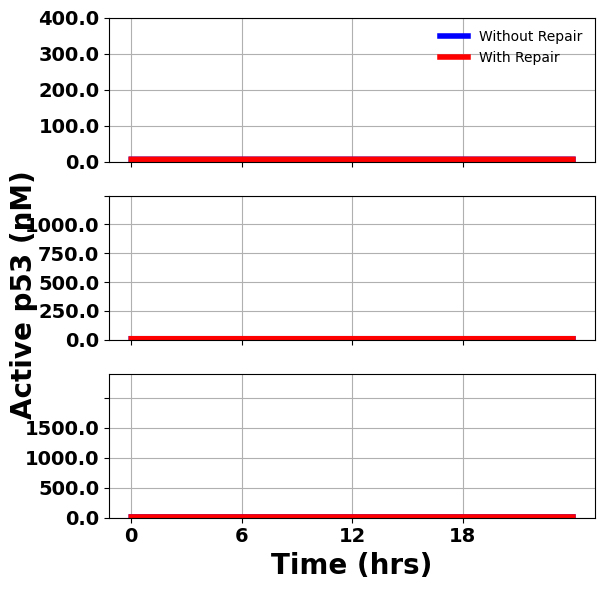

In [ ]:
with open (f'DNA-repair/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

conds = []
for key in data.keys():
    conds.append(key)

# Set up a 1x3 subplot grid
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

# Plot single stranded break results
axs[0].plot(data[conds[0]]['time']/3600, data[conds[0]]['simulation p53_active'], label='Without Repair', color='blue', linewidth=4)
axs[0].plot(data[conds[1]]['time']/3600, data[conds[1]]['simulation p53_active'], label='With Repair', color='red', linewidth=4)
axs[0].grid(True)
axs[0].set_ylim(0, 400)
axs[0].set_yticklabels(axs[0].get_yticks(), weight='bold', fontsize=14)
axs[0].set_xticks(np.arange(0, 24, step=6))
axs[0].legend(frameon=False)

# Plot double stranded break results
axs[1].plot(data[conds[2]]['time']/3600, data[conds[2]]['simulation p53_active'], label='Without Repair', color='blue', linewidth=4)
axs[1].plot(data[conds[3]]['time']/3600, data[conds[3]]['simulation p53_active'], label='With Repair', color='red', linewidth=4)
axs[1].grid(True)
axs[1].set_ylim(0, 1000)
axs[1].set_yticklabels(axs[1].get_yticks(), weight='bold', fontsize=14)
axs[1].set_xticks(np.arange(0, 24, step=6))

# Plot single- and double-stranded break results
axs[2].plot(data[conds[4]]['time']/3600, data[conds[4]]['simulation p53_active'], label='Without Repair', color='blue', linewidth=4)
axs[2].plot(data[conds[5]]['time']/3600, data[conds[5]]['simulation p53_active'], label='With Repair', color='red', linewidth=4)
axs[2].grid(True)
axs[2].set_ylim(0, 1200)
axs[2].set_yticklabels(axs[2].get_yticks(), weight='bold', fontsize=14)
axs[2].set_xticklabels(axs[2].get_xticks(), weight='bold', fontsize=14)

# Set the x-axis label
axs[2].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(0.0, 0.5, 'Active p53 (nM)', va='center', rotation='vertical', weight='bold', fontsize=20)

plt.tight_layout()
fig.savefig('DNA-repair/results/{DATE_CONST}.png')


### p53 Dynamics Benchmark


{'conditionId': 'DamageDSB_1', 'cell': 0, 'simulation p53_pulse': array([6.03669353]), 'experiment p53_pulse': array([1000], dtype=int64), 'time': array([108000.])}


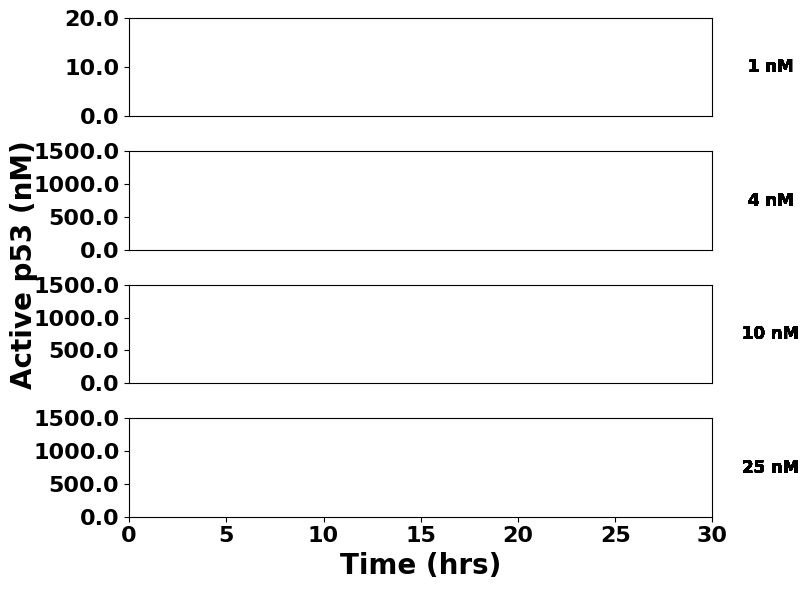

In [4]:
with open(f'p53-dynamics/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

condition_concentrations = ['1 nM', '4 nM', '10 nM', '25 nM']

# instatiate the registry of simulations matching each condition of interest.
conds_registry = CellPopMetrics(data=data).get_registry()

fig, axes = plt.subplots(4,1, figsize=(8,6))
for i, condition in enumerate(conds_registry):
    for simulation in data:
        
        ax = axes[i]

        if simulation in conds_registry[condition]:

            ax.plot(data[simulation]['time']/3600, data[simulation]['simulation p53_pulse'], linewidth=4)
            ax.text(
                    1.1, 0.5, condition_concentrations[i], horizontalalignment='center', 
                    verticalalignment='center', transform=ax.transAxes, fontsize=12, weight='bold'
                    )
            
            if condition == 'DamageDSB_1':
                ax.set_ylim(0, 20) 
            else:
                ax.set_ylim(0, 1500)
            # ax.set_title(condition)
            # ax.legend()
            ax.set_xlim(0, 30)
            ax.set_xticks([])
        if i==3:
            ax.set_xticks(np.arange(0, 31, step=5))
        
        ax.set_xticklabels(ax.get_xticks(), fontsize=16, weight='bold')
        ax.set_yticklabels(ax.get_yticks(), fontsize=16, weight='bold')
plt.subplots_adjust(hspace=0.5)
        # Set the x-axis label
axes[3].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(-0.01, 0.55, 'Active p53 (nM)', va='center', rotation='vertical', weight='bold', fontsize=20)
plt.tight_layout()
fig.savefig('p53-dynamics/results/{DATE_CONST}.png')

### TRAIL Time To Death Benchmark

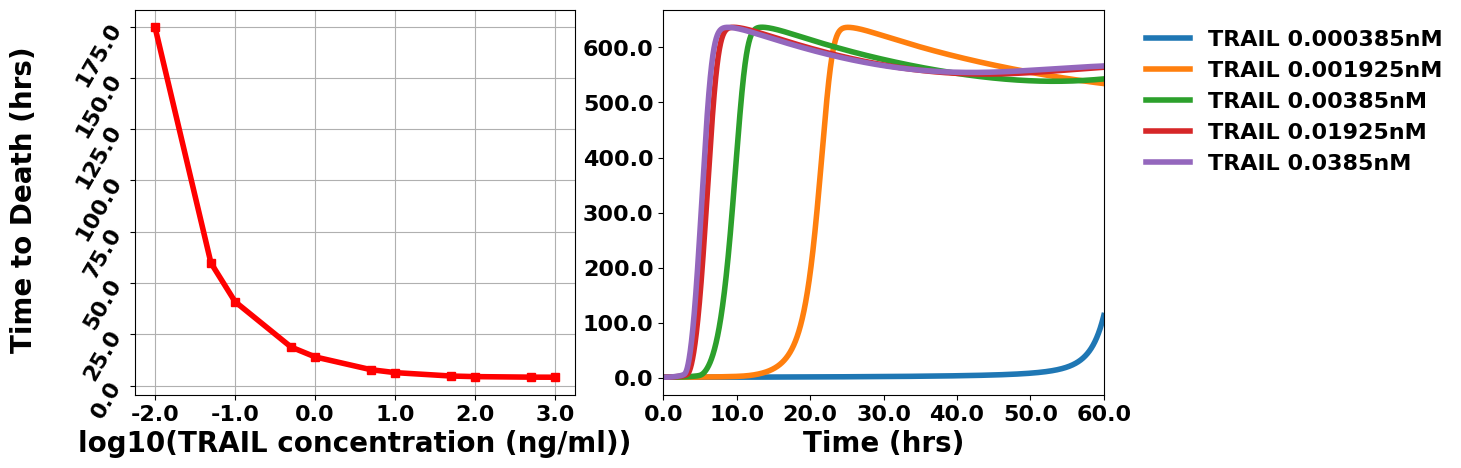

In [2]:
with open(f'TRAIL_time-to-death/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

traildoses = np.array([0.000385, 0.001925, 0.00385, 0.01925, 0.0385, 0.1925, 0.385, 1.9250, 3.85, 19.25, 38.5])
dosesngperml = traildoses*2.597402597402597e+01

conditions =[]
for condition in data:
    conditions.append(condition)

legend = []
for dose in traildoses:
    legend.append('TRAIL ' + str(dose) + 'nM')
fig, axs = plt.subplots(1, 2, figsize=(12.5, 5))
for i in range(1,11,2):
    axs[1].plot(data[conditions[i]]['time']/3600, data[conditions[i]]['simulation cPARP_total'], linewidth=4)
    axs[1].set_xlim([0, 60])
    axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16, weight='bold')
    axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16, weight='bold')
    legend_properties = {'weight':'bold', 'size':16}
    axs[1].legend(labels=legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, frameon=False, prop=legend_properties)


time_of_death = CellDeathMetrics(data, 'simulation cPARP_total').average_time_to_death()

axs[0].plot(np.log10(dosesngperml),[tod/3600 for tod in time_of_death.values()],marker='s',linewidth=4, color='red')
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16, weight='bold')
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16, weight='bold', rotation=60)
axs[0].grid(True)

# Set the x-axis label
axs[0].set_xlabel('log10(TRAIL concentration (ng/ml))', weight='bold', fontsize=20)
axs[1].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(0.025, 0.5, 'Time to Death (hrs)', va='center', rotation='vertical', weight='bold', fontsize=20)

fig.savefig(f'TRAIL_time-to-death/results/{DATE_CONST}.png', dpi=300, bbox_inches='tight')

## TRAIL Percent Survival Benchmark

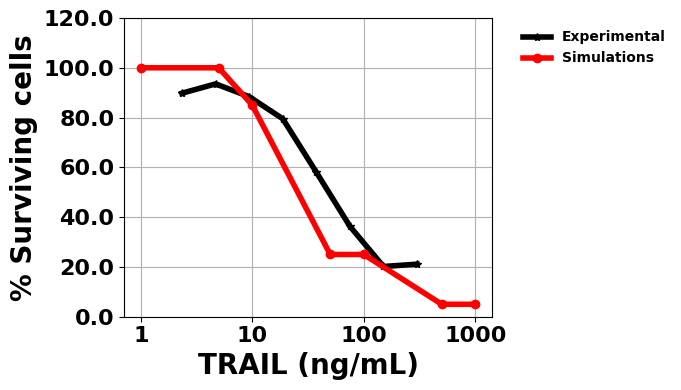

In [2]:
with open(f'TRAIL-percent-death/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

doses = [0.0385, 0.1925, 0.385, 1.925, 3.85, 19.25, 38.5]
alive_ratio = CellDeathMetrics(data, 'simulation cPARP_total').alive_ratio(percent=True)

dosesngperml = np.array(doses)*2.597402597402597e+01

trailexpdoses = [2.34375,4.6875,9.375,18.75,37.5,75.0,150.0,300.0] # From Bouhaddou2018 model paper
trailexppdeath = [89.79,93.53,88.40,79.53,58.08,36.34,20.18,21.11] # From Bouhaddou2018 model paper

plt.figure(figsize=(7, 4))
plt.plot(np.log10(np.array(trailexpdoses)),np.array(trailexppdeath),
          marker='*', color = 'black', linewidth=4, label='Experiment') # Experimental
plt.plot(np.log10(np.array(dosesngperml)),
          alive_ratio,marker='o', color='red', 
          linewidth=4, label='Simulation') # Simulations
plt.xlabel('TRAIL (ng/mL)', multialignment='center', 
            fontsize=20, weight='bold')
plt.ylabel('% Surviving cells', 
            fontsize=20, weight='bold')
plt.grid(True)

plt.ylim(0, 120)
plt.xticks(np.arange(0,4,step=1),('1', '10', '100', '1000'), 
            weight='bold', fontsize=16)
ax = plt.gca()
ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize=16)
legend_properties = {'weight':'bold'}
plt.legend(['Experimental','Simulations'], frameon = False, 
            bbox_to_anchor=[1.05, 1], loc='upper left', 
            fontsize=16, prop=legend_properties)
plt.tight_layout()
plt.savefig(f'TRAIL-percent-death/results/{DATE_CONST}.png', dpi=300, bbox_inches='tight')

## Survival Signaling Benchmark

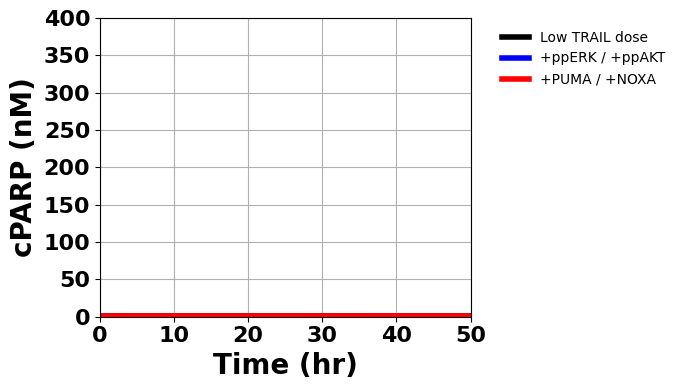

In [7]:
with open(f'survival-signalling/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

conditions = []
for condition in data:
    conditions.append(condition)

plt.figure(figsize=(7, 4))

plt.plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation cPARP_total'], label='TRAIL only', linewidth=4, color='black')
plt.plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation cPARP_total'], label='+ppERK/+ppAKT', linewidth=4, color='blue')
plt.plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation cPARP_total'], label='+PUMA/+NOXA', linewidth=4, color='red')
plt.xlabel('Time (hr)', fontsize=20, weight='bold')
plt.ylabel('cPARP (nM)', fontsize=20, weight='bold')
plt.grid(True)
plt.xlim(0, 50)
plt.ylim(0, 400)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.legend(['Low TRAIL dose','+ppERK / +ppAKT','+PUMA / +NOXA'], bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(f'survival-signalling/results/{DATE_CONST}.png'), dpi=300)

## Cell Cycle Benchmark

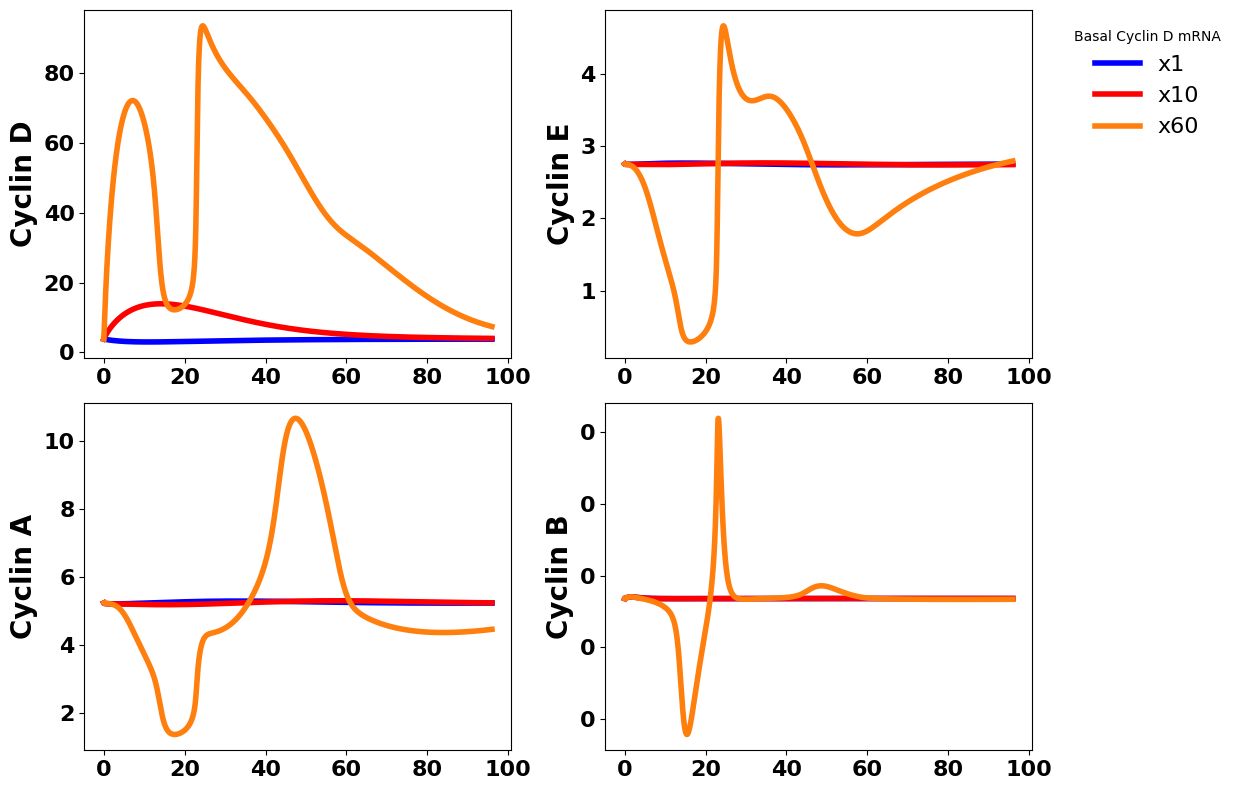

In [10]:
with open(f'cell_cycle/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

conditions = []
for key in data:
    conditions.append(key)

fig, ax = plt.subplots(2,2, figsize=(12.5,8))

#Cyclin D plot
ax[0,0].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation Cd_total'], linewidth=4, color='b')
ax[0,0].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation Cd_total'], linewidth=4, color='r')
ax[0,0].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation Cd_total'], linewidth=4, color='tab:orange')
ax[0,0].set_yticklabels(ax[0,0].get_yticks().astype(int), weight='bold', fontsize=16)
ax[0,0].set_xticklabels(ax[0,0].get_xticks().astype(int), weight='bold', fontsize=16)
ax[0,0].set_ylabel('Cyclin D', weight='bold', fontsize=20)

#Cyclin E plot
ax[0,1].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation Ce_total'], linewidth=4, color='b')
ax[0,1].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation Ce_total'], linewidth=4, color='r')
ax[0,1].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation Ce_total'], linewidth=4, color='tab:orange')
ax[0,1].set_yticklabels(ax[0,1].get_yticks().astype(int), weight='bold', fontsize=16)
ax[0,1].set_xticklabels(ax[0,1].get_xticks().astype(int), weight='bold', fontsize=16)
ax[0,1].set_ylabel('Cyclin E', weight='bold', fontsize=20)
ax[0,1].legend(['x1', 'x10', 'x60'], title = 'Basal Cyclin D mRNA', 
               bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=16)

#Cyclin A plot
ax[1,0].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation Ca_total'], linewidth=4, color='b')
ax[1,0].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation Ca_total'], linewidth=4, color='r')
ax[1,0].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation Ca_total'], linewidth=4, color='tab:orange')
ax[1,0].set_yticklabels(ax[1,0].get_yticks().astype(int), weight='bold', fontsize=16)
ax[1,0].set_xticklabels(ax[1,0].get_xticks().astype(int), weight='bold', fontsize=16)
ax[1,0].set_ylabel('Cyclin A', weight='bold', fontsize=20)

#Cyclin B plot
ax[1,1].plot(data[conditions[0]]['time']/3600, data[conditions[0]]['simulation Cb_total'], linewidth=4, color='b')
ax[1,1].plot(data[conditions[1]]['time']/3600, data[conditions[1]]['simulation Cb_total'], linewidth=4, color='r')
ax[1,1].plot(data[conditions[2]]['time']/3600, data[conditions[2]]['simulation Cb_total'], linewidth=4, color='tab:orange')
ax[1,1].set_yticklabels(ax[1,1].get_yticks().astype(int), weight='bold', fontsize=16)
ax[1,1].set_xticklabels(ax[1,1].get_xticks().astype(int), weight='bold', fontsize=16)
ax[1,1].set_ylabel('Cyclin B', weight='bold', fontsize=20)

fig.tight_layout()
fig.savefig(f'cell_cycle/results/{DATE_CONST}.png', dpi=300)

## Etoposide Induced Cell Death Benchmark

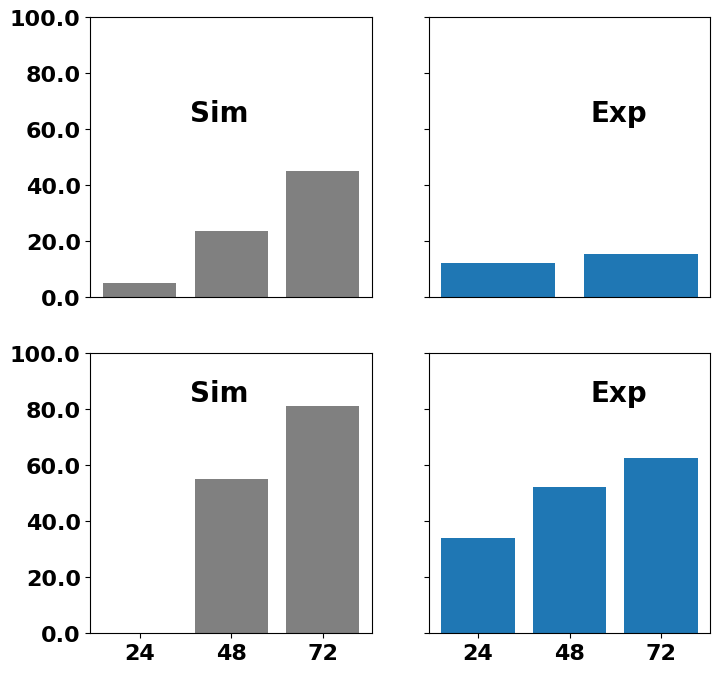

In [10]:
# Main code execution
data_file = f'etoposide-induced-cell-death/results/{DATE_CONST}.pkl'
data = Helpers.load_data(data_file)
conds_registry = CellPopMetrics(data).get_registry()

CELLS_PER_SIM_CONDITION = 80

dead_cells_sim = CellDeathMetrics(data, 'simulation cPARP_100plus').time_to_death()
dead_cells_exp = Helpers.extract_experimental_data(data)

dead_cells_per_cond_sim = CellDeathMetrics.calculate_dead_cells(dead_cells_sim, CELLS_PER_SIM_CONDITION)
dead_cells_per_cond_exp = CellDeathMetrics.match_calculate_dead_cells_struct(dead_cells_exp)

# Plotting
split_left_right = LeftRightSplit(nrows = 2, ncols = 2, figsize = (8, 8), width_ratios = [4,4])
split_left_right.plot_left_bar(data=dead_cells_per_cond_sim, colors = ['grey', 'grey'], error_bars=False, x_labels=['24', '48', '72'], y_range=[0, 100])

split_left_right.plot_right(dead_cells_per_cond_exp, error_bars=False, x_labels=['24', '48', '72'], y_range=[0, 100])

split_left_right.disable_axes_labels(axes='right', y_axis=True)

split_left_right.add_text(text='Sim', x=0.25, y=0.75, fontsize=20, weight='bold')
split_left_right.add_text(text='Sim', x=0.25, y=0.4, fontsize=20, weight='bold')
split_left_right.add_text(text='Exp', x=0.75, y=0.75, fontsize=20, weight='bold')
split_left_right.add_text(text='Exp', x=0.75, y=0.4, fontsize=20, weight='bold')

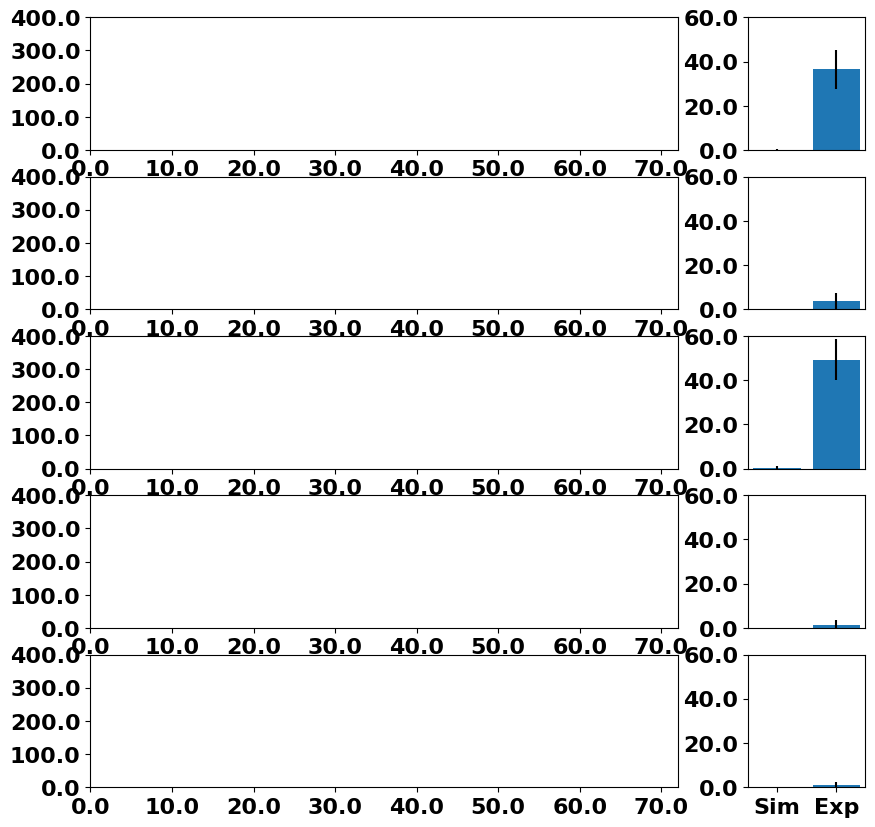

In [ ]:
data_file = f'regulation-of-stochastic-proliferation/results/{DATE_CONST}.pkl'
data = Helpers.load_data(data_file)
conds_registry = CellPopMetrics(data).get_registry()

cond_labels = ['EGF', 'INS', 'EGF+INS', 'EGF+INS+MEKi', 'EGF+INS+AKTi']

# Constants
SPHASE_THRESHOLD = 20 # Summation of Cyclin Complexes over the course of the simulation
CELLS_PER_CONDITION = 30 # Define the number of cells per condition

# Plotting
split_left_right = LeftRightSplit(nrows = 5, ncols = 2, figsize = (10, 10), width_ratios = [5,1])

split_left_right.plot_left(data=data, dependent_var='time', 
                           independent_var='simulation cycA_Cdk2_total', 
                           conds_registry=conds_registry, colors = None)

sphase_ratios = CellPopMetrics(data=data).cells_above_threshold(observable='simulation Sphase', 
                                                                    threshold= SPHASE_THRESHOLD, 
                                                                    experimental_data='experiment Sphase')

split_left_right.plot_right(sphase_ratios, error_bars=True, x_labels=['Sim', 'Exp'],
                            y_range=[0, 60], colors=None, CELLS_PER_CONDITION=CELLS_PER_CONDITION)

## Inhibition of Stochastic Apoptosis Benchmark

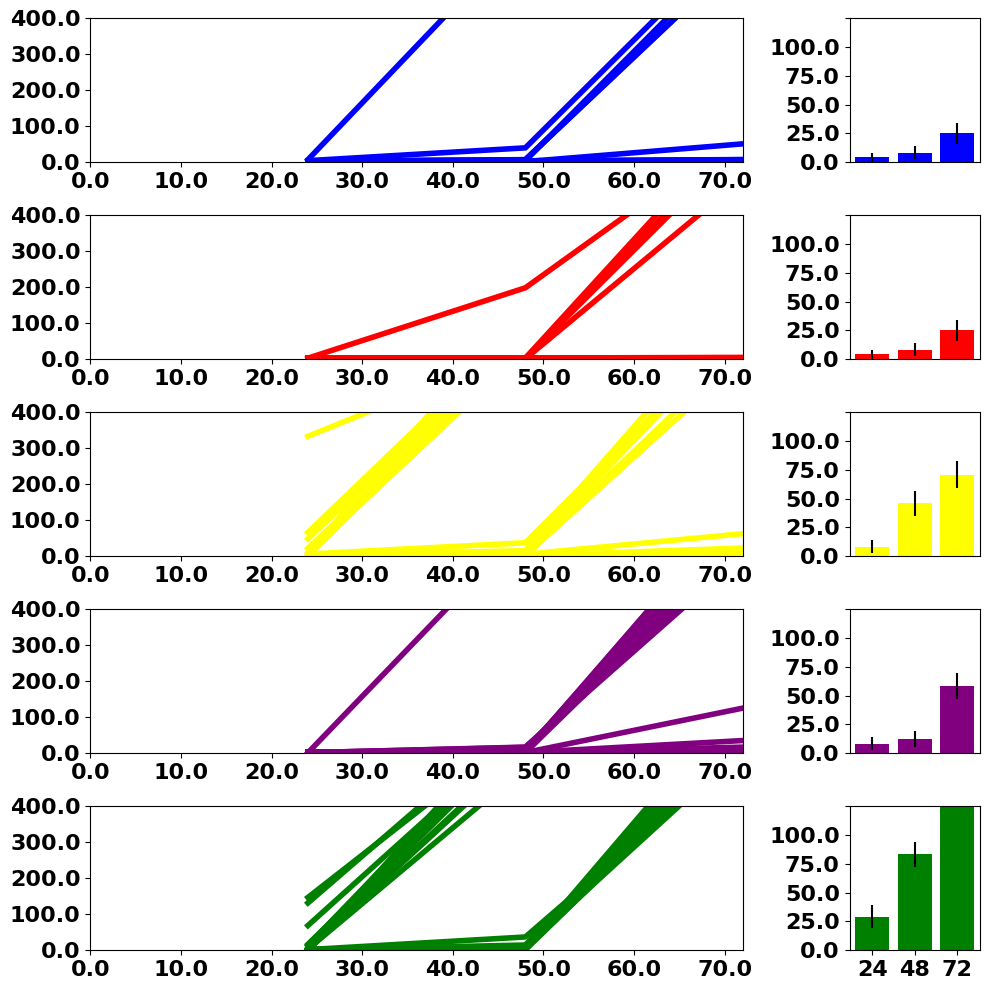

In [3]:
COLORS = ['blue', 'red', 'yellow', 'purple', 'green']
CELLS_PER_CONDITION = 30  # Define the number of cells per condition


# Main code execution
data_file = f'inhibition-of-stochastic-apoptosis/results/{DATE_CONST}.pkl'
data = Helpers.load_data(data_file)
conds_registry = CellPopMetrics(data).get_registry()

# Plotting
split_left_right = LeftRightSplit(nrows = 5, ncols = 2, figsize = (10, 10), width_ratios = [5,1])
split_left_right.plot_left(data=data, dependent_var='time', 
                           independent_var='simulation cPARP_total', 
                           conds_registry=conds_registry, colors = COLORS)

dead_cells = CellDeathMetrics(data, 'simulation cPARP_total').time_to_death()
dead_cells_24to72 = CellDeathMetrics.calculate_dead_cells(dead_cells, CELLS_PER_CONDITION)

split_left_right.plot_right(dead_cells_24to72, error_bars=True, x_labels=['24', '48', '72'], 
                            y_range=[0, 100], colors=COLORS, CELLS_PER_CONDITION=CELLS_PER_CONDITION)

plt.tight_layout()
fig.savefig(f'inhibition-of-stochastic-apoptosis/results/{DATE_CONST}.png', dpi=300)

## BIM Dependent ERK Inhibition Benchmark

In [2]:
with open(f'BIM-dependent-ERK-inhibition/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

dead_cells = CellDeathMetrics(data, 'simulation cPARP_total').death_ratio(percent=True)
dead_cell_values = np.array(list(dead_cells.values()))
conditions = []
for condition in data:
    conditions.append(condition)

labels=['BAD-dependent', 'BIM-dependent']

num_cells = len(data[conditions[0]])
dc_sem = np.sqrt((dead_cell_values*(100-dead_cell_values))/num_cells)

fig = plt.figure(figsize=(3, 4))
plt.bar(dead_cells.keys(), dead_cells.values(), yerr=dc_sem, capsize=5, color='blue')
plt.ylim(0, 100)
plt.yticks(np.arange(0, 150, 50), fontsize=16, weight='bold')
plt.ylabel('% Death', fontsize=16, weight='bold')
plt.xticks(ticks=range(len(dead_cells)), labels=labels,rotation=45, fontsize=16, weight='bold')
# plt.title('E + I @ 48 hours (SPARCED)', y=1.05)
plt.tight_layout()

plt.savefig(f'BIM-dependent-ERK-inhibition/results/{DATE_CONST}.png', dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: 'BIM-dependent-ERK-inhibition/results/2024-12-19.pkl'

## Regulation of stochastic proliferation Benchmark


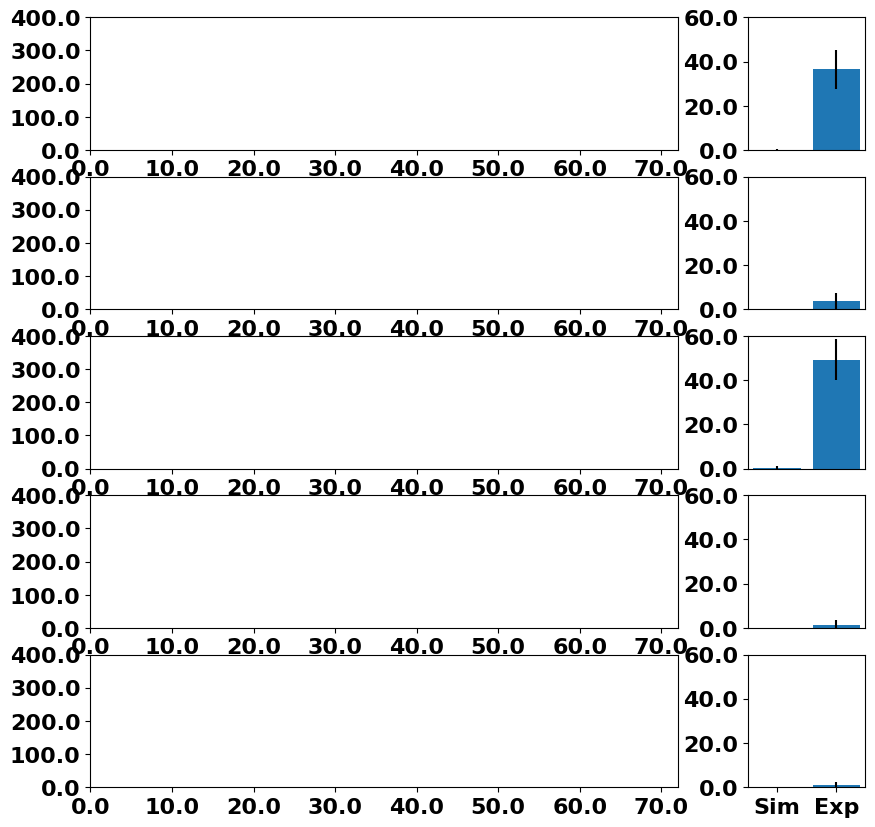

In [2]:
data_file = f'regulation-of-stochastic-proliferation/results/{DATE_CONST}.pkl'
data = Helpers.load_data(data_file)
conds_registry = CellPopMetrics(data).get_registry()

cond_labels = ['EGF', 'INS', 'EGF+INS', 'EGF+INS+MEKi', 'EGF+INS+AKTi']

# Constants
SPHASE_THRESHOLD = 20 # Summation of Cyclin Complexes over the course of the simulation
CELLS_PER_CONDITION = 30 # Define the number of cells per condition

# Plotting
split_left_right = LeftRightSplit(nrows = 5, ncols = 2, figsize = (10, 10), width_ratios = [5,1])

split_left_right.plot_left(data=data, dependent_var='time', 
                           independent_var='simulation cycA_Cdk2_total', 
                           conds_registry=conds_registry, colors = None)

sphase_ratios = CellPopMetrics(data=data).cells_above_threshold(observable='simulation Sphase', 
                                                                    threshold= SPHASE_THRESHOLD, 
                                                                    experimental_data='experiment Sphase')

split_left_right.plot_right(sphase_ratios, error_bars=True, x_labels=['Sim', 'Exp'],
                            y_range=[0, 60], colors=None, CELLS_PER_CONDITION=CELLS_PER_CONDITION)

## Ribosome Doubling Rate Benchmark

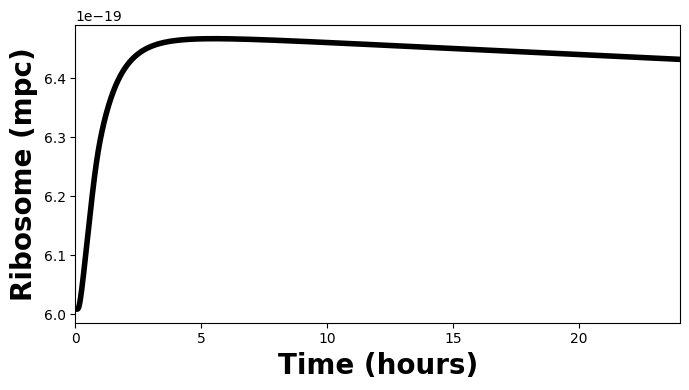

In [10]:
with open(f'ribosome-doubling-rate/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)
Vc = 5.25E-12

mpc2nmcf_Vc = 1.0E9/(Vc*6.023E+23)

conditions = []
for condition in data:
    conditions.append(condition)

plt.figure(figsize=(7, 4))
yy = np.array(data[conditions[0]]['simulation Ribosome_total'])
tt = (data[conditions[0]]['time']/3600)
plt.plot(tt, yy,linewidth=4, color='black')
plt.xlim([0, 24])
plt.ylabel('Ribosome (mpc)', fontsize=20, weight='bold')
plt.xlabel('Time (hours)', fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig('ribosome-doubling-rate.png')

## ERK and AKT Dose Dependent Responses Benchmark

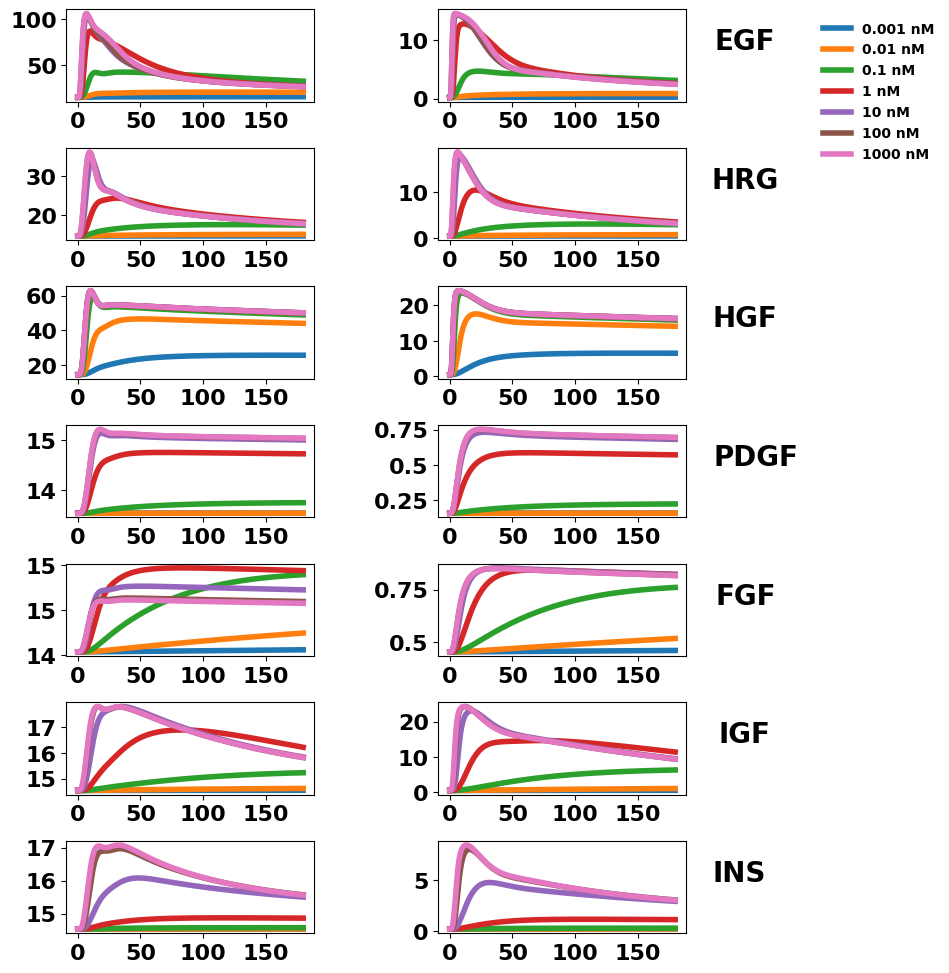

In [9]:
with open(f'ERK-AKT-dose-response/results/{DATE_CONST}.pkl', 'rb') as f:
    data = pickle.load(f)

conditional_strings = ['EGF', 'HRG', 'HGF', 'PDGF', 'FGF', 'IGF', 'INS']
fig, axes = plt.subplots(7, 2, figsize=(8, 12))
conditions = []
for condition in data:
    conditions.append(condition)

for i in range(7):
    upper = (i+1)*7
    lower = upper - 7
    for j in range(lower, upper):
        axes[i, 0].plot(data[conditions[j]]['time'] / 60, data[conditions[j]]['simulation ppERK_total'], linewidth=4)
        axes[i, 1].plot(data[conditions[j]]['time'] / 60, data[conditions[j]]['simulation ppAKT_total'], linewidth=4)

    axes[i, 1].set_yticklabels(axes[i, 1].get_yticks().astype(int), fontsize=16, weight='bold')
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticks().astype(int), fontsize=16, weight='bold')
    axes[i, 0].set_yticklabels(axes[i, 0].get_yticks().astype(int), fontsize=16, weight='bold')
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticks().astype(int), fontsize=16, weight='bold')
    axes[i, 1].set_ylabel(conditional_strings[i], fontsize=20, weight='bold', labelpad=-250, rotation=0)
axes[3, 1].set_ylabel(conditional_strings[3], fontsize=20, weight='bold', labelpad=-275, rotation=0)
axes[4, 1].set_ylabel(conditional_strings[4], fontsize=20, weight='bold', labelpad=-268, rotation=0)
axes[6, 1].set_ylabel(conditional_strings[6], fontsize=20, weight='bold', labelpad=-235, rotation=0)

axes[3, 1].set_yticklabels(np.arange(0.0,1.0, step=0.25), fontsize=16, weight='bold')
axes[4, 1].set_yticklabels(axes[4, 1].get_yticks(), fontsize=16, weight='bold')
legend_values = ['0.001 nM', '0.01 nM', '0.1 nM', '1 nM', '10 nM', '100 nM', '1000 nM']
legend_properties = {'weight':'bold'}
axes[0, 1].legend(labels = legend_values, loc='upper left', bbox_to_anchor=(1.5, 1), frameon=False, fontsize=20, prop=legend_properties)


# plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.savefig('ERK-AKT-dose-response.png', dpi=300, bbox_inches='tight')

## Validations Complete